# Tugas : Assignment 5 Sistem Kendali
### Anggota Kelompok : 
##### 481478 - Alfina Shafiyyah M.
##### 474649 - Enas Erliana Z. Y.
##### 480765 - Jihan Aanisa Z.
##### 477776 - Sabrina Aisha A.
##### 478471 - Sahriar Hilmi

In [1]:
# install module
# %pip install slycot
# %pip install control
# %pip install controlsystems

# pada file discretization.py ubah from error menjadi from controlsystems.error dan from types menjadi from controlsystems.types
# pada file tipes ubah from error menjadi from controlsystems.error

In [2]:
# import module
import numpy as np
import matplotlib.pyplot as plt
from control import matlab
from controlsystems.pid_simulation import ZieglerNichols, CohenCoon
from controlsystems.types import TransferFunction
from controlsystems.discretization import Euler
import time

In [3]:
# inisiasi parameter
J = 0.01
b = 0.1
K = 0.01
R = 1
L = 0.5
s = matlab.tf('s')


In [4]:
# simplify transfer function
P = K/((J*s+b)*(L*s+R)+(K*K))
sys = matlab.tf(P)
matlab.minreal(sys)

0 states have been removed from the model


TransferFunction(array([2.]), array([ 1.  , 12.  , 20.02]))

In [5]:
# transfer Function
g = TransferFunction([2], [1, 12, 20.02])

In [6]:
# fungsi plot
def plotPID(G):
    # transfer function
    print("Transfer function: ",G )

    # menampilkan step info
    stepInfo = matlab.stepinfo(G)
    step_out, T = matlab.step(5*G)
    print("Rise Time: ", stepInfo['RiseTime'])
    print("Settling Time: ", stepInfo['SettlingTime'])
    print("Overshoot: ", stepInfo['Overshoot'])
    print("Steady-state Error: ", np.abs(5 - step_out[len(step_out) - 1]))
    for i in range(len(step_out)):
        if step_out[i] > 0.0:
            print("Delay Time: ", T[i-1])
            break

    # definisi plot
    fig, ([step, impulse], [ramp, acceleration]) = plt.subplots(2, 2, figsize=(12, 12))

    # step response
    step_out, T = matlab.step(G)
    step.plot(T, step_out, label = 'Step')
    step.set_title('Step Response')
    step.set_xlabel('Time (seconds)')
    step.set_ylabel('Amplitude')
    step.grid()
    step.legend()

    # ramp response
    ramp_out, T = matlab.step(G/s)
    ramp.plot(np.linspace(T[0], T[len(T)-1]), np.linspace(T[0], T[len(T)-1]), label = 'ideal')
    ramp.plot(T, ramp_out, label = 'Ramp')
    ramp.set_title('Ramp Response')
    ramp.set_xlabel('Time (seconds)')
    ramp.set_ylabel('Amplitude')
    ramp.grid()
    ramp.legend()

    # impulse response
    impulse_out, T = matlab.impulse(G)
    impulse.plot(T, impulse_out, label = 'Impulse')
    impulse.set_title('Impulse Response')
    impulse.set_xlabel('Time (seconds)')
    impulse.set_ylabel('Amplitude')
    impulse.grid()
    impulse.legend()

    # acceleration response
    acceleration_out, T = matlab.step(G/s/s)
    acceleration.plot(T, acceleration_out, label = 'Acceleration')
    acceleration.set_title('Acceleration Response')
    acceleration.set_xlabel('Time (seconds)')
    acceleration.set_ylabel('Amplitude')
    acceleration.grid()
    acceleration.legend()

    # menampilkan plot
    plt.show()

Waktu proses:  0.018970251083374023 

Kp:  76.57650015394888
Ki:  478.60312596218046
Kd:  3.063060006157956 

Transfer function:  
      0.03063 s^2 + 0.7658 s + 4.786
------------------------------------------
0.005 s^3 + 0.09063 s^2 + 0.8659 s + 4.786

Rise Time:  0.1199482563897767
Settling Time:  0.8129826266418199
Overshoot:  30.394575877282403
Steady-state Error:  0.004981336878748799
Delay Time:  0.0


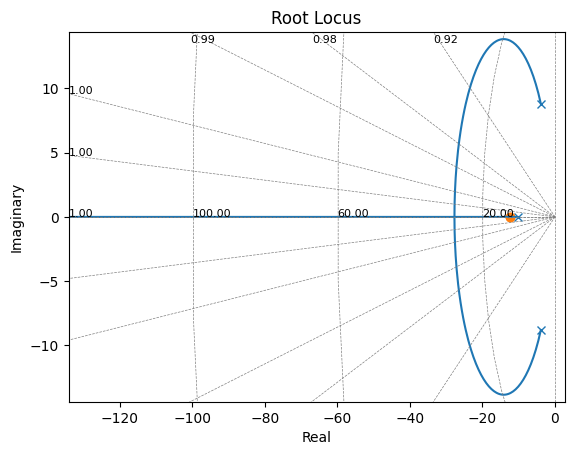

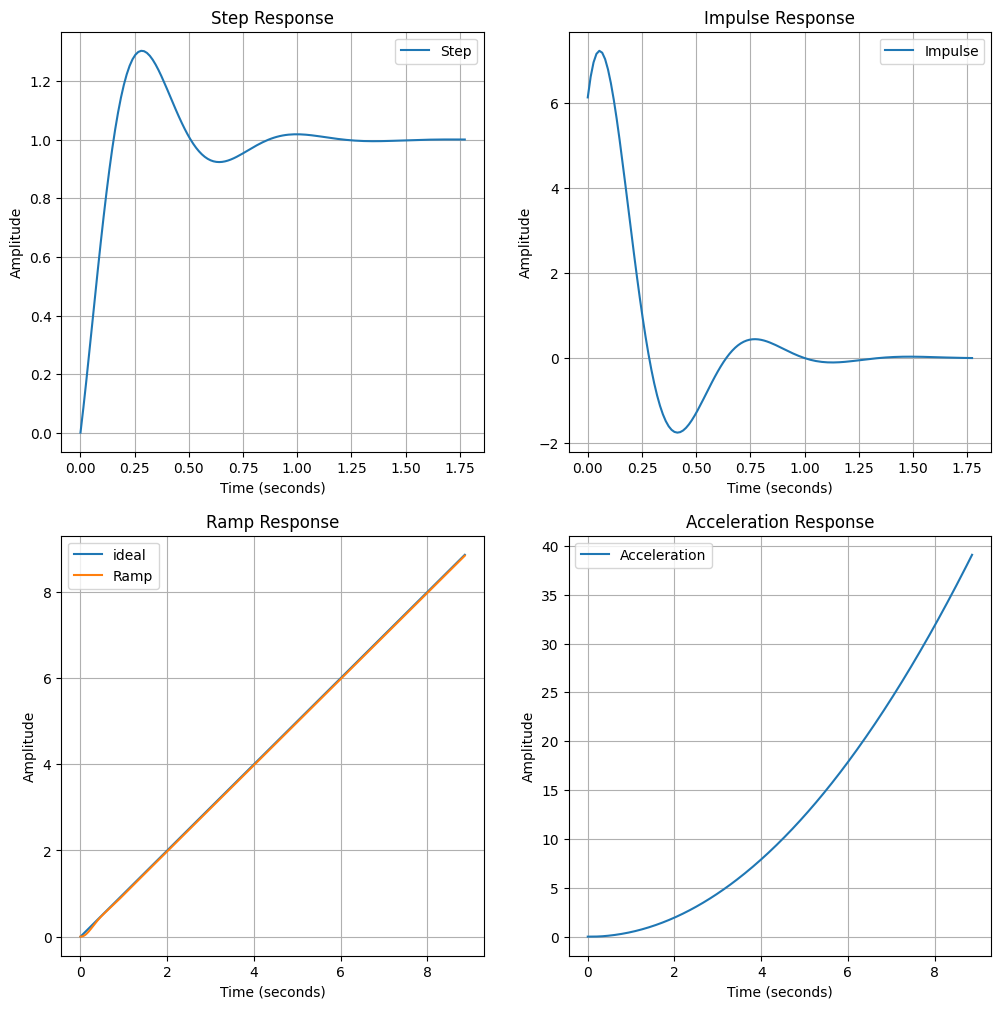

In [7]:
# Ziegler - Nichols 2
start = time.time()
KpZN, KiZN, KdZN = ZieglerNichols(g, 0.01, 10, Euler)
end = time.time()
print("Waktu proses: ", end - start, "\n")

print("Kp: ", KpZN)
print("Ki: ", KiZN)
print("Kd: ", KdZN, "\n")
TFZN = matlab.tf([KdZN, KpZN, KiZN], [1, 0])
GZN = matlab.feedback(sys * TFZN, 1)

matlab.rlocus(GZN)
plotPID(GZN)

Waktu proses:  0.013136863708496094 

Kp:  46.49287509346897
Ki:  251.49047762613048
Kd:  13.046143767630907 

Transfer function:  
     0.1305 s^2 + 0.4649 s + 2.515
----------------------------------------
0.005 s^3 + 0.1905 s^2 + 0.565 s + 2.515

Rise Time:  0.2543122115329677
Settling Time:  1.84669790528555
Overshoot:  8.927343859281422
Steady-state Error:  0.00020289162159148333
Delay Time:  0.0


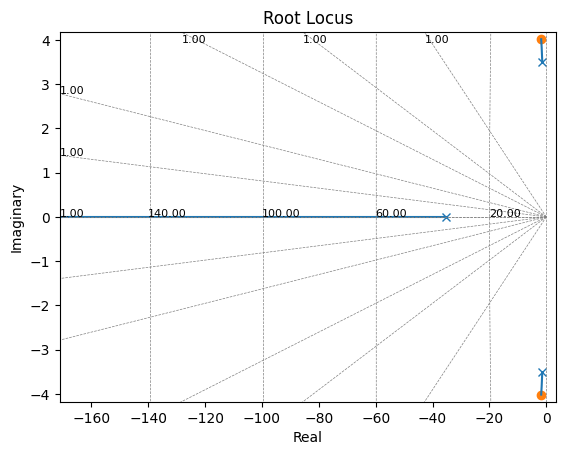

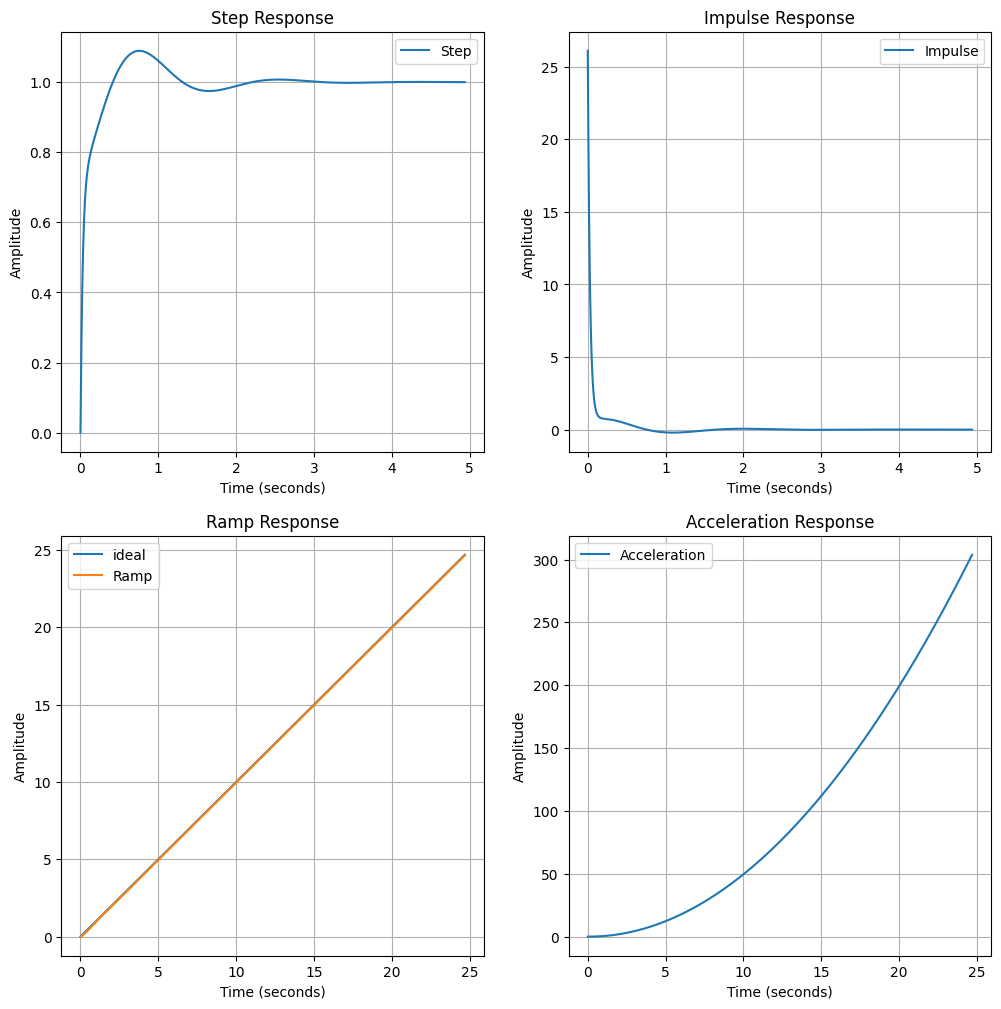

In [8]:
# Cohen - Coon
start = time.time()
KpCC, KiCC, KdCC = CohenCoon(g, 0.01, 10, Euler)
end = time.time()
print("Waktu proses: ", end - start, "\n")

print("Kp: ", KpCC)
print("Ki: ", KiCC)
print("Kd: ", KdCC, "\n")
TFCC = matlab.tf([KdCC, KpCC, KiCC], [1, 0])
GCC = matlab.feedback(sys * TFCC, 1)

matlab.rlocus(GCC)
plotPID(GCC)